Проект по анализу совершенных покупок

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Загружаем таблицу с уникальными идентификаторами пользователей

In [2]:
df_customers = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-artemov/olist_customers_dataset.csv')

In [3]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
df_customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [5]:
df_customers.shape

(99441, 5)

Загружаем таблицу заказов

In [6]:
df_orders = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-artemov/olist_orders_dataset.csv')

In [7]:
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [8]:
df_orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

Переведем в необходимый формат данные с датами

In [9]:
df_orders.order_purchase_timestamp = pd.to_datetime(df_orders.order_purchase_timestamp)
df_orders.order_approved_at = pd.to_datetime(df_orders.order_approved_at)
df_orders.order_delivered_carrier_date = pd.to_datetime(df_orders.order_delivered_carrier_date)
df_orders.order_delivered_customer_date = pd.to_datetime(df_orders.order_delivered_customer_date)
df_orders.order_estimated_delivery_date = pd.to_datetime(df_orders.order_estimated_delivery_date)

Загружаем таблицу с товарными позициями, входящими в заказы

In [10]:
df_order_items = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-artemov/olist_order_items_dataset.csv')

In [11]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [12]:
df_order_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [13]:
df_order_items.shipping_limit_date = pd.to_datetime(df_order_items.shipping_limit_date)

ЗАДАНИЕ 1 (Сколько у нас пользователей, которые совершили покупку только один раз?)

Отфильтруем только те заказы, по которым существует подтвержденное время оплаты заказа, что подтверждает покупку
Соединим таблицу с заказами и таблицу с пользователями по позаказному идентификатору пользователя
Сгруппируем данные по уникальному идентификатору пользователя и посчитаем количество тех, у кого кол-во заказов =1

In [14]:
df_orders.query("order_approved_at != 'NaN'")\
         .merge(df_customers, on = 'customer_id')\
         .groupby('customer_unique_id',as_index = False)\
         .agg({'order_id' : 'count'})\
         .query('order_id == 1')\
         .count()

customer_unique_id    93049
order_id              93049
dtype: int64

Посчитаем процент пользователей, совершивших одну покупку 

In [15]:
round(100*(93049/df_customers.customer_unique_id.count()),2)

93.57

ЗАДАНИЕ 2 (Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?)

Для анализа не доставленных заказов возьмем те заказы, у которых не указано фактическое время доставки заказа

In [16]:
df_not_delivery = df_orders.fillna(0).query('order_delivered_customer_date == 0')

Примем за теорию, что дата Now - является датой =  дате крайней записи по времени создания заказа, а именно 2018-10-17
Исходя из этого, мы можем откинуть из анализа только те заказы, даты ожидаемой доставки которых > крайней даты заказа, и не принимать во внимание статус заказа и ожидаемое время доставки, так как по отношению ко времени Now они все будут являться не доставленными вовремя

In [17]:
df_not_delivery.sort_values('order_purchase_timestamp')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
4541,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,0,2016-10-20
4396,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,0,0,2016-10-28
10071,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,0,0,2016-09-30
83078,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02 22:07:52,2016-10-06 15:50:56,0,0,2016-10-25
76582,1aecadf4362edaca7fa033e882076c8d,e81a9f176936e3124dfd90c483bf3289,canceled,2016-10-04 10:05:45,2016-10-04 10:26:40,0,0,2016-11-24
...,...,...,...,...,...,...,...,...
50387,392ed9afd714e3c74767d0c4d3e3f477,2823ffda607a2316375088e0d00005ec,canceled,2018-09-29 09:13:03,0,0,0,2018-10-15
88500,616fa7d4871b87832197b2a137a115d2,bf6181a85bbb4115736c0a8db1a53be3,canceled,2018-10-01 15:30:09,0,0,0,2018-10-23
31891,a2ac6dad85cf8af5b0afb510a240fe8c,4c2ec60c29d10c34bd49cb88aa85cfc4,canceled,2018-10-03 18:55:29,0,0,0,2018-10-16
68373,b059ee4de278302d550a3035c4cdb740,856336203359aa6a61bf3826f7d84c49,canceled,2018-10-16 20:16:02,0,0,0,2018-11-12


In [18]:
df_not_delivery.order_purchase_timestamp.max()

Timestamp('2018-10-17 17:30:18')

In [19]:
df_not_delivery = df_not_delivery.query("order_estimated_delivery_date < '2018-10-17'")

In [20]:
df_not_delivery.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,0,0,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,0,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,0,0,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,0,0,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,0,2018-02-07


In [21]:
df_not_delivery.shape

(2960, 8)

Для анализа не доставленных заказов по месяцам - возьмем месяц обещанной доставки 

In [22]:
df_not_delivery['date_order_purchase'] = df_not_delivery.order_estimated_delivery_date.dt.to_period("M")

In [23]:
df_not_delivery.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,date_order_purchase
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,0,0,2017-05-09,2017-05
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,0,2018-06-28,2018-06
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,0,0,2018-08-21,2018-08
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,0,0,2017-10-03,2017-10
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,0,2018-02-07,2018-02


In [24]:
df_not_delivery = df_not_delivery.sort_values('date_order_purchase')

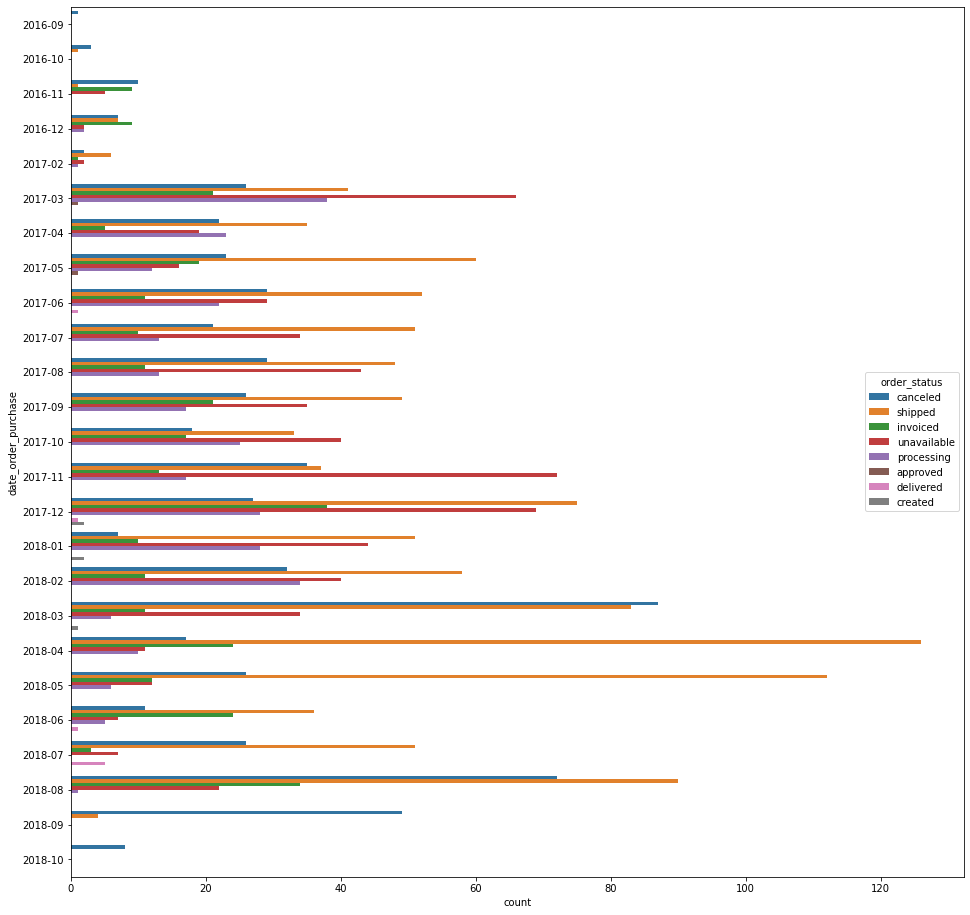

In [25]:
plt.figure(figsize=(16,16))
sns.countplot(y=df_not_delivery.date_order_purchase, hue = df_not_delivery.order_status)

Для наглядности сведем данные о количестве всех не доставленных заказах с разбивкой по причинам

In [26]:
df_not_delivery_pivot = df_not_delivery.groupby(['date_order_purchase', 'order_status'], as_index = False)\
               .agg({'order_id' : 'count'})\
               .pivot(index = 'date_order_purchase', columns = 'order_status', values = 'order_id')\
               .fillna(0)
df_not_delivery_pivot

order_status,approved,canceled,created,delivered,invoiced,processing,shipped,unavailable
date_order_purchase,,,,,,,,
2016-09,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-10,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0
2016-11,0.0,10.0,0.0,0.0,9.0,0.0,1.0,5.0
2016-12,0.0,7.0,0.0,0.0,9.0,2.0,7.0,2.0
2017-02,0.0,2.0,0.0,0.0,1.0,1.0,6.0,2.0
2017-03,1.0,26.0,0.0,0.0,21.0,38.0,41.0,66.0
2017-04,0.0,22.0,0.0,0.0,5.0,23.0,35.0,19.0
2017-05,1.0,23.0,0.0,0.0,19.0,12.0,60.0,16.0
2017-06,0.0,29.0,0.0,1.0,11.0,22.0,52.0,29.0


Исходя из полученных данных, можем сделать вывод о том, что большинство не доставленных заказов остаются на статусе 
"shipped". Кроме того, стоит заметить, что мы получили восемь заказов со статусом "delivered", однако время доставки заказа
отсутсвует, что говорит о сбое в сборе данных 

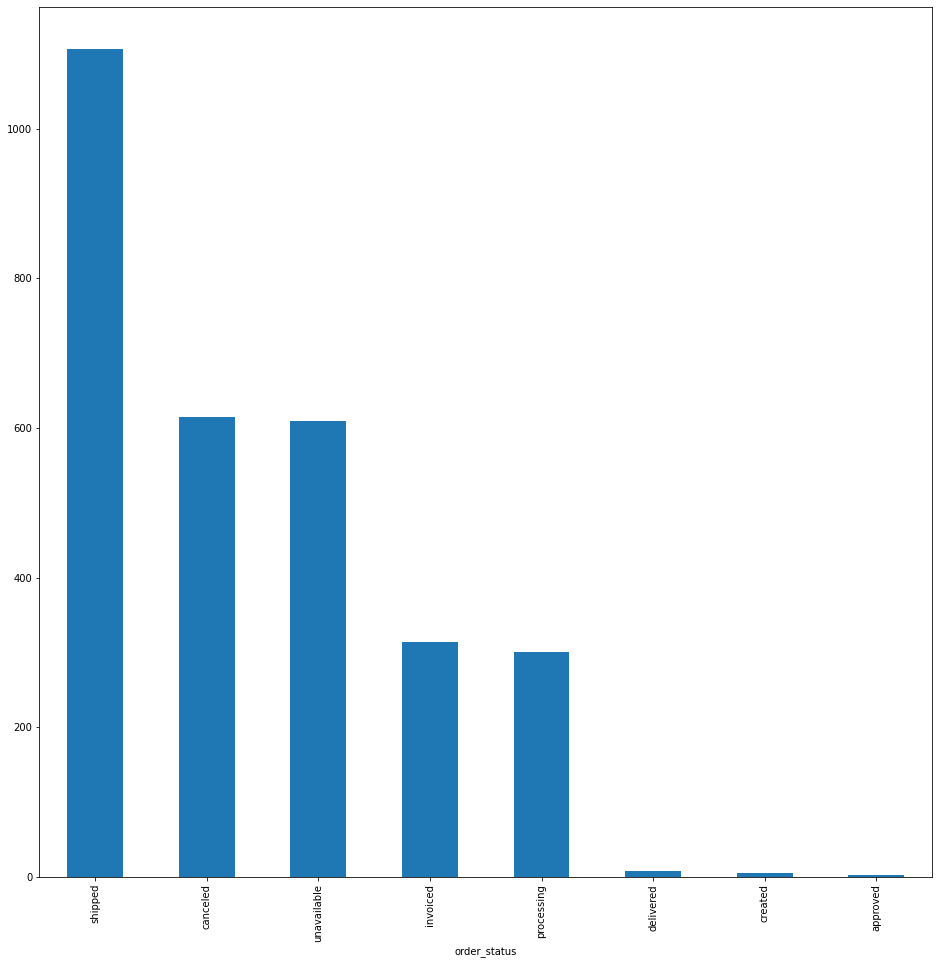

In [27]:
plt.figure(figsize=(16,16))
df_not_delivery_pivot.sum().sort_values(ascending = False).plot.bar()

Найдем среднее количество не доставленных заказов в месяц

In [28]:
df_not_delivery.groupby('date_order_purchase', as_index = False)\
               .agg({'order_id' : 'count'}).mean()

order_id    118.4
dtype: float64

Выведем среднемесячное количество недоставленных заказов в разрезе причин

In [29]:
df_not_delivery.groupby(['date_order_purchase', 'order_status'], as_index = False).agg({'order_id' : 'count'})\
               .groupby('date_order_purchase', as_index=False).agg({'order_id': 'mean'}).round(2)

,date_order_purchase,order_id
0,2016-09,1.00
1,2016-10,2.00
2,2016-11,6.25
3,2016-12,5.40
4,2017-02,2.40
5,2017-03,32.17
6,2017-04,20.80
7,2017-05,21.83
8,2017-06,24.00
9,2017-07,25.80


ЗАДАНИЕ 3 (По каждому товару определить, в какой день недели товар чаще всего покупается)

Соединим данные по двум таблицам по заказам, товарам в заказе и дате подтверждения оплаты(как и в первом задании будем считать покупку случившейся после оплаты)

In [30]:
df_orders_product = df_orders[['order_id', 'order_approved_at']].merge(df_order_items[['order_id', 'product_id']], on = 'order_id', how = 'right')

In [31]:
df_orders_product['name_day'] = df_orders_product.order_approved_at.dt.day_name()

In [32]:
df_orders_product = df_orders_product.query("order_approved_at != 'NaN'")

In [33]:
df_orders_product

,order_id,order_approved_at,product_id,name_day
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 09:45:35,4244733e06e7ecb4970a6e2683c13e61,Wednesday
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 11:05:13,e5f2d52b802189ee658865ca93d83a8f,Wednesday
2,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:48:30,c777355d18b72b67abbeef9df44fd0fd,Sunday
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:10:18,7634da152a4610f1595efa32f14722fc,Wednesday
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 14:10:13,ac6c3623068f30de03045865e4e10089,Saturday
...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,2018-04-25 04:11:01,4aa6014eceb682077f9dc4bffebc05b0,Wednesday
112646,fffcd46ef2263f404302a634eb57f7eb,2018-07-17 04:31:48,32e07fd915822b0765e448c4dd74c828,Tuesday
112647,fffce4705a9662cd70adb13d4a31832d,2017-10-24 17:14:25,72a30483855e2eafc67aee5dc2560482,Tuesday
112648,fffe18544ffabc95dfada21779c9644f,2017-08-15 00:04:32,9c422a519119dcad7575db5af1ba540e,Tuesday


In [34]:
df_orders_product_pivot = df_orders_product.groupby(['product_id', 'name_day'], as_index = False)\
               .agg({'order_id' : 'count'})\
               .pivot(index = 'product_id', columns = 'name_day', values = 'order_id')\
               .fillna(0)

Вывели по каждому товару количество покупок по дням недели

In [35]:
df_orders_product_pivot

name_day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
product_id,,,,,,,
00066f42aeeb9f3007548bb9d3f33c38,0.0,0.0,0.0,1.0,0.0,0.0,0.0
00088930e925c41fd95ebfe695fd2655,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0009406fd7479715e4bef61dd91f2462,1.0,0.0,0.0,0.0,0.0,0.0,0.0
000b8f95fcb9e0096488278317764d19,1.0,0.0,0.0,0.0,0.0,0.0,1.0
000d9be29b5207b54e86aa1b1ac54872,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
fff6177642830a9a94a0f2cba5e476d1,0.0,1.0,1.0,0.0,0.0,0.0,0.0
fff81cc3158d2725c0655ab9ba0f712c,0.0,1.0,0.0,0.0,0.0,0.0,0.0
fff9553ac224cec9d15d49f5a263411f,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [36]:
df_orders_product_pivot['max_buy_day'] = df_orders_product_pivot.apply(lambda x: df_orders_product_pivot.columns[x.argmax()], axis = 1)

Выведем по каждому товару день недели в котором наибольшее количество покупок товара

In [37]:
df_orders_product_pivot['max_buy_day']

product_id
00066f42aeeb9f3007548bb9d3f33c38       Sunday
00088930e925c41fd95ebfe695fd2655      Tuesday
0009406fd7479715e4bef61dd91f2462       Friday
000b8f95fcb9e0096488278317764d19       Friday
000d9be29b5207b54e86aa1b1ac54872      Tuesday
                                      ...    
fff6177642830a9a94a0f2cba5e476d1       Monday
fff81cc3158d2725c0655ab9ba0f712c       Monday
fff9553ac224cec9d15d49f5a263411f     Saturday
fffdb2d0ec8d6a61f0a0a0db3f25b441      Tuesday
fffe9eeff12fcbd74a2f2b007dde0c58    Wednesday
Name: max_buy_day, Length: 32948, dtype: object

Посмотрим в какой из дней было куплено наибольшее количество товаров

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


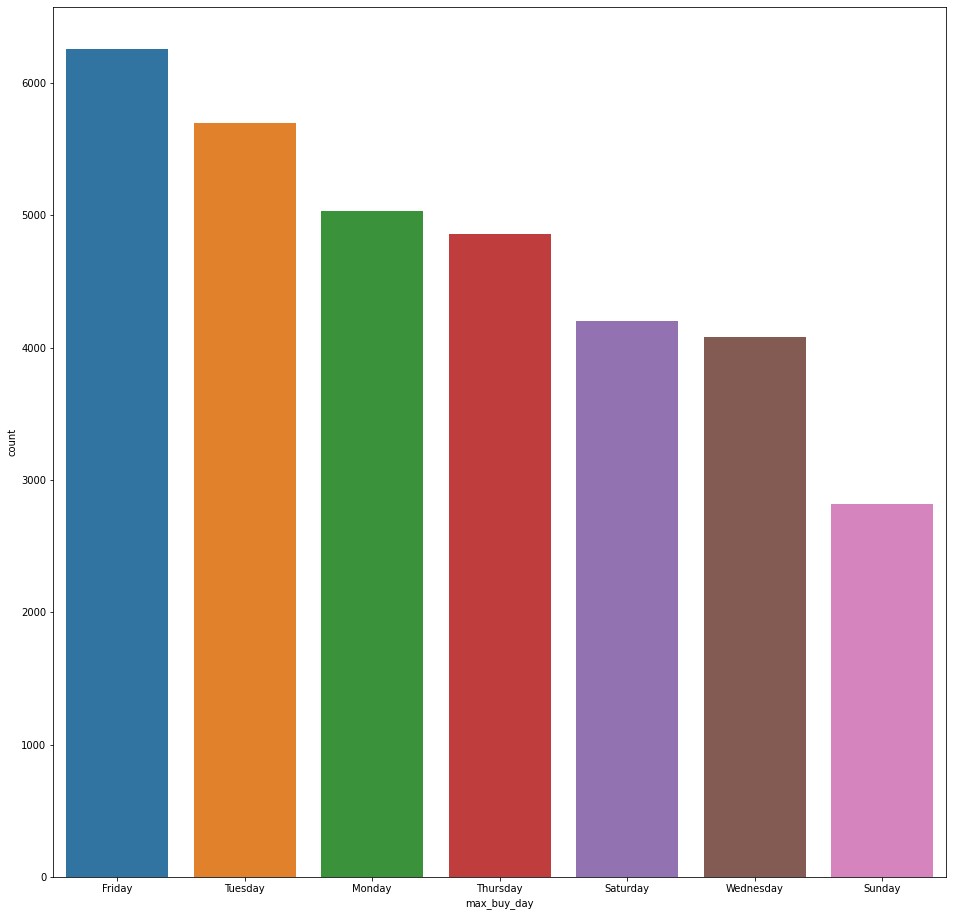

In [38]:
plt.figure(figsize=(16,16))
sns.countplot(df_orders_product_pivot.max_buy_day, order=df_orders_product_pivot['max_buy_day'].value_counts().index)


ЗАДАНИЕ 4 (Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть)

Снова отберем только те заказы у которых присутствует дата оплаты и соединим с таблицей пользователей по customer_id

In [39]:
df_customers_order = df_orders.query("order_approved_at != 'NaN'")\
         .merge(df_customers, on = 'customer_id')

In [40]:
df_customers_order

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99276,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99277,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99278,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99279,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [41]:
df_customers_order = df_customers_order[['order_id', 'customer_unique_id', 'order_approved_at']]

In [42]:
df_customers_order

,order_id,customer_unique_id,order_approved_at
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 11:07:15
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,2018-07-26 03:24:27
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:55:23
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:45:59
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 22:20:29
...,...,...,...
99276,9c5dedf39a927c1b2549525ed64a053c,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-09 09:54:05
99277,63943bddc261676b46f01ca7ac2f7bd8,da62f9e57a76d978d02ab5362c509660,2018-02-06 13:10:37
99278,83c1379a015df1e13d02aae0204711ab,737520a9aad80b3fbbdad19b66b37b30,2017-08-27 15:04:16
99279,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c,2018-01-08 21:36:21


In [43]:
df_customers_order['date'] = df_customers_order.order_approved_at.dt.to_period('M')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
df_customers_order

,order_id,customer_unique_id,order_approved_at,date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 11:07:15,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,2018-07-26 03:24:27,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:55:23,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:45:59,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 22:20:29,2018-02
...,...,...,...,...
99276,9c5dedf39a927c1b2549525ed64a053c,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-09 09:54:05,2017-03
99277,63943bddc261676b46f01ca7ac2f7bd8,da62f9e57a76d978d02ab5362c509660,2018-02-06 13:10:37,2018-02
99278,83c1379a015df1e13d02aae0204711ab,737520a9aad80b3fbbdad19b66b37b30,2017-08-27 15:04:16,2017-08
99279,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c,2018-01-08 21:36:21,2018-01


In [45]:
customers_orders_in_month = df_customers_order.groupby(['customer_unique_id', 'date'], as_index = False).agg({'order_id' : 'count'})

Посчитали количество покупок сделанных пользователем в каждом месяце

In [46]:
customers_orders_in_month

,customer_unique_id,date,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1
2,0000f46a3911fa3c0805444483337064,2017-03,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1
...,...,...,...
97907,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,1
97908,fffea47cd6d3cc0a88bd621562a9d061,2017-12,1
97909,ffff371b4d645b6ecea244b27531430a,2017-02,1
97910,ffff5962728ec6157033ef9805bacc48,2018-05,1


In [47]:
customers_orders_in_month['mean_in_week'] = customers_orders_in_month.order_id / (customers_orders_in_month.date.dt.days_in_month / 7)

Посчитали среднее количество покупок пользователей в неделю в каждом месяце

In [48]:
customers_orders_in_month

,customer_unique_id,date,order_id,mean_in_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1,0.225806
2,0000f46a3911fa3c0805444483337064,2017-03,1,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1,0.233333
...,...,...,...,...
97907,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,1,0.233333
97908,fffea47cd6d3cc0a88bd621562a9d061,2017-12,1,0.225806
97909,ffff371b4d645b6ecea244b27531430a,2017-02,1,0.250000
97910,ffff5962728ec6157033ef9805bacc48,2018-05,1,0.225806


ЗАДАНИЕ 5 (Проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц)

Отберем заказы оплаченные и соединим с таблицей пользователей

In [49]:
df_customers_order_2 = df_orders.query("order_approved_at != 'NaN'").merge(df_customers, on = 'customer_id')

In [50]:
df_customers_order_2['date'] = pd.to_datetime(df_customers_order_2.order_approved_at, format = '%Y-%m')

In [51]:
df_customers_order_2 = df_customers_order[['order_id', 'customer_unique_id', "order_approved_at", 'date']]

Выведем месяц первой покупки пользователя

In [52]:
df_customers_order_2.set_index('customer_unique_id', inplace=True)
df_customers_order_2['First_buy_date'] = df_customers_order_2.groupby(level=0)['order_approved_at'].min().dt.strftime('%Y-%m')
df_customers_order_2.reset_index(inplace=True)

In [53]:
df_customers_order_2.First_buy_date = pd.to_datetime(df_customers_order_2.First_buy_date)

In [54]:
df_customers_order_2

,customer_unique_id,order_id,order_approved_at,date,First_buy_date
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 11:07:15,2017-10,2017-09-01
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-26 03:24:27,2018-07,2018-07-01
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:55:23,2018-08,2018-08-01
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:45:59,2017-11,2017-11-01
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 22:20:29,2018-02,2018-02-01
...,...,...,...,...,...
99276,6359f309b166b0196dbf7ad2ac62bb5a,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,2017-03,2017-03-01
99277,da62f9e57a76d978d02ab5362c509660,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 13:10:37,2018-02,2018-02-01
99278,737520a9aad80b3fbbdad19b66b37b30,83c1379a015df1e13d02aae0204711ab,2017-08-27 15:04:16,2017-08,2017-08-01
99279,5097a5312c8b157bb7be58ae360ef43c,11c177c8e97725db2631073c19f07b62,2018-01-08 21:36:21,2018-01,2018-01-01


Сохраним год и месяц первой покупки

In [55]:
df_customers_order_2["First_buy_date"] = df_customers_order_2["First_buy_date"].dt.to_period('M')

In [56]:
df_customers_order_2[["customer_unique_id", "date", "First_buy_date"]]

,customer_unique_id,date,First_buy_date
0,7c396fd4830fd04220f754e42b4e5bff,2017-10,2017-09
1,af07308b275d755c9edb36a90c618231,2018-07,2018-07
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08,2018-08
3,7c142cf63193a1473d2e66489a9ae977,2017-11,2017-11
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02,2018-02
...,...,...,...
99276,6359f309b166b0196dbf7ad2ac62bb5a,2017-03,2017-03
99277,da62f9e57a76d978d02ab5362c509660,2018-02,2018-02
99278,737520a9aad80b3fbbdad19b66b37b30,2017-08,2017-08
99279,5097a5312c8b157bb7be58ae360ef43c,2018-01,2018-01


Создадим когорту и рассчитаем количество активных пользователей когорты по месяцам активности 

In [57]:
cohorts = df_customers_order_2.groupby(["First_buy_date", "date"]).agg({"customer_unique_id" : "nunique"})

In [58]:
cohorts

customer_unique_id
First_buy_date date                       
2016-09        2016-09                   1
2016-10        2016-10                 317
               2017-04                   1
               2017-07                   1
               2017-09                   1
...                                    ...
2018-06        2018-08                  16
2018-07        2018-07                5962
               2018-08                  30
2018-08        2018-08                6398
               2018-09                   1

[220 rows x 1 columns]

In [59]:
cohort_sizes = cohorts.groupby(level = "First_buy_date").agg({"customer_unique_id":"first"})

In [60]:
cohort_sizes.columns = ["cohort_size"]

In [61]:
cohort_sizes

,cohort_size
First_buy_date,
2016-09,1
2016-10,317
2016-12,1
2017-01,726
2017-02,1736
2017-03,2643
2017-04,2323
2017-05,3592
2017-06,3148


In [165]:
cohorts = cohorts.join(cohort_sizes, on = "First_buy_date")

Получили количество активных пользователей когорты на месяц активности и кол-во пользователей когорты в первый месяц (cohort_size)

In [166]:
cohorts

customer_unique_id  cohort_size
First_buy_date date                                    
2016-09        2016-09                   1            1
2016-10        2016-10                 317          317
               2017-04                   1          317
               2017-07                   1          317
               2017-09                   1          317
...                                    ...          ...
2018-06        2018-08                  16         5936
2018-07        2018-07                5962         5962
               2018-08                  30         5962
2018-08        2018-08                6398         6398
               2018-09                   1         6398

[220 rows x 2 columns]

In [167]:
cohorts["retencion"] = cohorts["customer_unique_id"]/cohorts["cohort_size"]

In [168]:
cohorts_pivot = cohorts.reset_index().pivot(columns="date", index="First_buy_date", values = "retencion")

In [169]:
cohorts_pivot = cohorts_pivot.fillna(0)

In [170]:
cohorts_pivot

date,2016-09,2016-10,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,...,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09
First_buy_date,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-10,0.0,1.0,0.0,0.0,0.00000,0.000000,0.003155,0.000000,0.000000,0.003155,...,0.000000,0.003155,0.000000,0.003155,0.000000,0.006309,0.006309,0.000000,0.000000,0.000000
2016-12,0.0,0.0,1.0,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01,0.0,0.0,0.0,1.0,0.00551,0.002755,0.001377,0.004132,0.001377,0.005510,...,0.002755,0.008264,0.004132,0.001377,0.001377,0.002755,0.004132,0.000000,0.001377,0.000000
2017-02,0.0,0.0,0.0,0.0,1.00000,0.002304,0.002304,0.001728,0.004032,0.001152,...,0.001152,0.002880,0.001728,0.001728,0.001152,0.000576,0.000576,0.002304,0.000000,0.000000
2017-03,0.0,0.0,0.0,0.0,0.00000,1.000000,0.004919,0.003405,0.003405,0.003405,...,0.001135,0.003784,0.001513,0.002270,0.001135,0.001513,0.002270,0.000757,0.001513,0.000000
2017-04,0.0,0.0,0.0,0.0,0.00000,0.000000,1.000000,0.006027,0.002152,0.001722,...,0.003444,0.001722,0.002152,0.000861,0.000861,0.000430,0.000861,0.000861,0.002152,0.000000
2017-05,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,1.000000,0.005290,0.005011,...,0.001670,0.002506,0.003062,0.002784,0.003341,0.001949,0.000557,0.001949,0.002506,0.000000
2017-06,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,1.000000,0.004765,...,0.003812,0.002224,0.001271,0.002224,0.003177,0.003812,0.001588,0.001271,0.001906,0.000000


Для поиска когорты с наибольшим показателем retencion на 3-й месяц отберем в список каждый третий месяц для каждой когорты 
Не берем две последние когорты, т.к. в них не будет 3-его месяца

In [171]:
columns = cohorts_pivot.columns
third_retention = []
for i in range(22):
    third_retention.append(cohorts_pivot.iloc[[i]][columns[i+2]][0])
    

Найдем индекс максимального retencion из всех на 3-й месяц

In [172]:
max_index = third_retention.index(max(third_retention))

In [173]:
cohorts_pivot.index[max_index]

Period('2017-05', 'M')

ЗАДАНИЕ 6 (Построить RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию)

Найдем сумму прибыли по каждому заказу

In [174]:
df_order_items_sum_price = df_order_items.groupby("order_id", as_index = False).agg({"price":"sum"})

In [175]:
df_order_items_sum_price

,order_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,58.90
1,00018f77f2f0320c557190d7a144bdd3,239.90
2,000229ec398224ef6ca0657da4fc703e,199.00
3,00024acbcdf0a6daa1e931b038114c75,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99
98662,fffcd46ef2263f404302a634eb57f7eb,350.00
98663,fffce4705a9662cd70adb13d4a31832d,99.90
98664,fffe18544ffabc95dfada21779c9644f,55.99


In [176]:
df_customers_order_2 = df_customers_order_2[['customer_unique_id', 'order_id', 'order_approved_at']]

Так же возьмем ранее использованную таблицу со всеми заказами, покупателя и датой оплаты

In [177]:
df_customers_order_2

,customer_unique_id,order_id,order_approved_at
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 11:07:15
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-26 03:24:27
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:55:23
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:45:59
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 22:20:29
...,...,...,...
99276,6359f309b166b0196dbf7ad2ac62bb5a,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05
99277,da62f9e57a76d978d02ab5362c509660,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 13:10:37
99278,737520a9aad80b3fbbdad19b66b37b30,83c1379a015df1e13d02aae0204711ab,2017-08-27 15:04:16
99279,5097a5312c8b157bb7be58ae360ef43c,11c177c8e97725db2631073c19f07b62,2018-01-08 21:36:21


Соединим две таблицы

In [178]:
df_orders_price = df_customers_order_2.merge(df_order_items_sum_price, on = 'order_id', how = 'left')

In [179]:
df_orders_price

,customer_unique_id,order_id,order_approved_at,price
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 11:07:15,29.99
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-26 03:24:27,118.70
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:55:23,159.90
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:45:59,45.00
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 22:20:29,19.90
...,...,...,...,...
99276,6359f309b166b0196dbf7ad2ac62bb5a,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,72.00
99277,da62f9e57a76d978d02ab5362c509660,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 13:10:37,174.90
99278,737520a9aad80b3fbbdad19b66b37b30,83c1379a015df1e13d02aae0204711ab,2017-08-27 15:04:16,205.99
99279,5097a5312c8b157bb7be58ae360ef43c,11c177c8e97725db2631073c19f07b62,2018-01-08 21:36:21,359.98


Для определения даты последней покупки возьмем "Сегодняшнюю" дату на день больше максимальной даты покупки в датасете

In [180]:
NOW = df_orders_price['order_approved_at'].max()+pd.Timedelta('1 day')

In [181]:
NOW

Timestamp('2018-09-04 17:40:06')

Сгруппируем по пользователям и найдем дату последней покупки, сумму потраченных денег и количество заказов

In [182]:
df_orders_price = df_orders_price.groupby('customer_unique_id', as_index = False).agg({'order_approved_at' : 'max', 'price' : 'sum', 'order_id' : 'count'})

In [183]:
df_orders_price['Recency'] = df_orders_price['order_approved_at'].apply(lambda x: (NOW-x).days)

In [184]:
df_orders_price = df_orders_price[['customer_unique_id', 'Recency', 'order_id', 'price']]

In [185]:
df_orders_price.columns = ['customer_unique_id', 'Recency', 'Frequency', 'Monetary']

In [186]:
df_orders_price

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
2,0000f46a3911fa3c0805444483337064,542,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00
...,...,...,...,...
95992,fffcf5a5ff07b0908bd4e2dbc735a684,452,1,1570.00
95993,fffea47cd6d3cc0a88bd621562a9d061,267,1,64.89
95994,ffff371b4d645b6ecea244b27531430a,574,1,89.90
95995,ffff5962728ec6157033ef9805bacc48,125,1,115.00


Посмотрим по полученным параметрам квантили с помощью функции describe()
Видим, что для значения частоты покупки все квантили крутятся около единицы

In [187]:
df_orders_price.Frequency.describe()

count    95997.000000
mean         1.034209
std          0.212521
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         17.000000
Name: Frequency, dtype: float64

Посмотрим какие значения принимает частота 

In [188]:
df_orders_price.Frequency.unique()

array([ 1,  2,  3,  4,  6,  7,  5,  9, 17])

Так же посмотрим на квантили и распределение для параметров давности заказа и принесенной прибыли

In [189]:
df_orders_price.Recency.describe()

count    95997.000000
mean       244.250904
std        153.282280
min          1.000000
25%        120.000000
50%        225.000000
75%        354.000000
max        719.000000
Name: Recency, dtype: float64

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


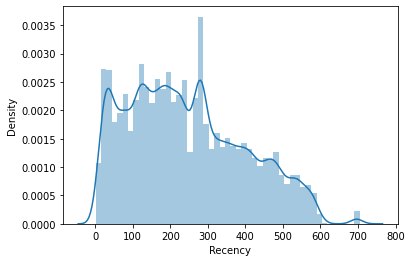

In [190]:
sns.distplot(df_orders_price.Recency)

In [191]:
df_orders_price.Monetary.describe()

count    95997.000000
mean       141.566646
std        217.282723
min          0.000000
25%         46.400000
50%         89.000000
75%        154.170000
max      13440.000000
Name: Monetary, dtype: float64

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


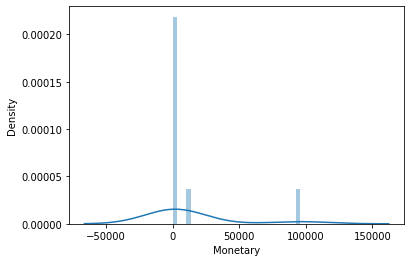

In [192]:
sns.distplot(df_orders_price.Monetary.describe())

Найдем квантили для ранжирования полученных параметров

In [193]:
quintiles = df_orders_price[['Recency', 'Monetary']].quantile([.25, .5, .75]).to_dict()
quintiles

{'Recency': {0.25: 120.0, 0.5: 225.0, 0.75: 354.0},
 'Monetary': {0.25: 46.4, 0.5: 89.0, 0.75: 154.17}}

Напишем функцию для расчета параметра для Recency, то есть чем меньше - тем лучше,
а для прибыли  - наоборот. Отдельно вручную пропишем раздедение по частоте на основании уникальных значений

In [194]:
def r_score(x):
    if x <= quintiles['Recency'][.25]:
        return 4
    elif x <= quintiles['Recency'][.5]:
        return 3
    elif x <= quintiles['Recency'][.75]:
        return 2
    else:
        return 1

def m_score(x):
    if x <= quintiles['Monetary'][.25]:
        return 1
    elif x <= quintiles['Monetary'][.5]:
        return 2
    elif x <= quintiles['Monetary'][.75]:
        return 3
    else:
        return 4
    
def f_score(x):
    if x <= 3:
        return 1
    elif x <= 6:
        return 2
    elif x <= 10:
        return 3
    else:
        return 4

In [195]:
df_orders_price['R'] = df_orders_price['Recency'].apply(lambda x: r_score(x))
df_orders_price['F'] = df_orders_price['Frequency'].apply(lambda x: f_score(x))
df_orders_price['M'] = df_orders_price['Monetary'].apply(lambda x: m_score(x))

In [196]:
df_orders_price

,customer_unique_id,Recency,Frequency,Monetary,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,4,1,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1,1
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,4
...,...,...,...,...,...,...,...
95992,fffcf5a5ff07b0908bd4e2dbc735a684,452,1,1570.00,1,1,4
95993,fffea47cd6d3cc0a88bd621562a9d061,267,1,64.89,2,1,2
95994,ffff371b4d645b6ecea244b27531430a,574,1,89.90,1,1,3
95995,ffff5962728ec6157033ef9805bacc48,125,1,115.00,3,1,3


Соединяем полученные ранжированные параметры в RFM Score

In [197]:
df_orders_price['RFM Score'] = df_orders_price['R'].map(str) + df_orders_price['F'].map(str) + df_orders_price['M'].map(str)

In [198]:
df_orders_price

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM Score
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,4,1,3,413
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1,1,411
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,4,214
...,...,...,...,...,...,...,...,...
95992,fffcf5a5ff07b0908bd4e2dbc735a684,452,1,1570.00,1,1,4,114
95993,fffea47cd6d3cc0a88bd621562a9d061,267,1,64.89,2,1,2,212
95994,ffff371b4d645b6ecea244b27531430a,574,1,89.90,1,1,3,113
95995,ffff5962728ec6157033ef9805bacc48,125,1,115.00,3,1,3,313


Разделим полученные результаты на несколько сегментов исходя из последней даты покупки и частоты покупок 

In [199]:
segt_map = {
    r'11': 'sleep', #Выделим тех, кто покупал более 354 дней назад и не более 3-х товаров в сегмент sleep, из-за долгого бездействия и малого 
    r'21': 'go to sleep', #Те кто покупали менее давно (больше 225 дней назад), но минимальное количество выделим в сегмент go tо sleep, из-за перспективы со временем перехода в сегмент sleep 
    r'31': 'perspective', #Тех кто купил более 120 дней назад и минимальное 
    r'41': 'new', #Тех кто купил менее 120 дней назад, но минимальное количество раз - определим в сегмент new
    r'1[2-3-4]': 'we need', #Определим тех, кто не покупал более 354дней, но делал покупки менее 3 раз в сегмент we need, т.к. необходимо вернуть часто покупающих клиентов
    r'2[2-3]': 'need attention',# Тех кто купил более 3, но не больше 10 раз, и сделали покупки уже более 225 дней назад определим в сегмент need attention, так как необходимо уделить внимание тем, кто покупает достаточно часто, пока окончательно не потеряли клиента
    r'3[2-3-4]': 'potencial loyal', #Тех, кто купил более 3 раз и сделал это крайний раз от 120 до 225 дней назад определим в сегмент потенциально лояльных клиентов
    r'4[2-3]': 'loyal', # Лояльными клиентами будем считать тех, кто купил недавно и от 3 до 10 товаров
    r'24': 'in danger', #В опасности для нас те клиенты, которые делали покупку крайний раз от 225 до 354дней назад, и сделали более 10 покупок, опасность заключаетсч в потере топовых клиентов
    r'44': 'top' # Топ клиенты - недавно купившие и сделавшие покупку >10 раз
}

df_orders_price['Segment'] = df_orders_price['R'].map(str) + df_orders_price['F'].map(str)
df_orders_price['Segment'] = df_orders_price['Segment'].replace(segt_map, regex=True)

In [200]:
df_orders_price.Segment.value_counts()

new                24122
perspective        24055
go to sleep        23918
sleep              23853
loyal                 22
potencial loyal       15
need attention         6
we need                5
top                    1
Name: Segment, dtype: int64